Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: Walmart_data.csv

User_ID:	User ID
Product_ID:	Product ID
Gender:	Sex of User
Age:	Age in bins
Occupation:	Occupation(Masked)
City_Category:	Category of the City (A,B,C)
StayInCurrentCityYears:	Number of years stay in current city
Marital_Status:	Marital Status
ProductCategory:	Product Category (Masked)
Purchase:	Purchase Amount

What good looks like?

Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.
Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)
Do some data exploration steps like:
Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
Inference after computing the average female and male expenses.
Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.
Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.
Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?
Perform the same activity for Married vs Unmarried and Age
For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.
Give recommendations and action items to Walmart.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as spy

In [160]:
df  = pd.read_csv('wallmart.csv')

In [161]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [162]:
#check the basic structure of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [163]:
#5 columns are of integer type
#5 columns are of string type
#No null values
#total columns are 10 and total rows are 550068

In [164]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [165]:
df['Age'] = df['Age'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')
df['Product_Category'] = df['Product_Category'].astype('int8')
df['Marital_Status'] = df['Marital_Status'].astype('category')

df['Occupation'] = df['Occupation'].astype('int8')
df['User_ID'] = df['User_ID'].astype('int32')



In [166]:
#Below is the general statistics of the data that includes both the numerical feature and non numerical feature
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.0,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,2.0,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,0.0,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,324731.0,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,NaN,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,NaN,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,8.000000,12054.000000


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int32   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int8    
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int8    
 9   Purchase                    550068 non-null  int64   
dtypes: category(4), int32(1), int64(1), int8(2), object(2)
memory usage: 17.8+ MB


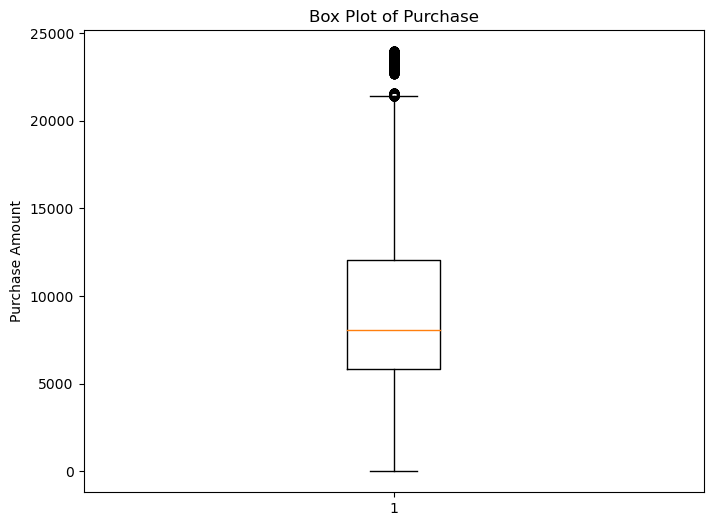

In [170]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'Single')


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int32   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int8    
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int8    
 9   Purchase                    550068 non-null  int64   
dtypes: category(4), int32(1), int64(1), int8(2), object(2)
memory usage: 17.8+ MB


In [172]:
# Total number of transactions made by each gender

df['Gender'].value_counts(normalize = True) * 100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [173]:
df['Stay_In_Current_City_Years'].value_counts(normalize = True) * 100
#From the above result, it is clear that majority of the transactions (53.75 % of total transactions) are made by the customers
#having 1 or 2 years of stay in the current city.

1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64

In [174]:
df.groupby(by = ['Gender'])['User_ID'].nunique()
#1666 are female unique customer
#4225 are male unique customer

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [311]:
print('Average number of transactions made by each Male on Black Friday is', round(414259 / 4225))
print('Average number of transactions made by each Female on Black Friday is', round(135809 / 1666))

Average number of transactions made by each Male on Black Friday is 98
Average number of transactions made by each Female on Black Friday is 82


In [175]:
df_gender_revenue = df.groupby(by = ['Gender'])['Purchase'].sum().to_frame()
df_gender_revenue['percent'] =(df_gender_revenue['Purchase']/df_gender_revenue['Purchase'].sum() )*100

In [176]:
df_gender_revenue

,Purchase,percent
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


In [177]:
df_gender_revenue

,Purchase,percent
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


In [178]:
#Male holds higher percentage share as compare to female

In [179]:
df['Marital_Status']

0          Single
1          Single
2          Single
3          Single
4          Single
           ...   
550063    Married
550064     Single
550065    Married
550066     Single
550067    Married
Name: Marital_Status, Length: 550068, dtype: category
Categories (2, object): ['Single', 'Married']

In [314]:
df.groupby(by = ['Marital_Status'])['User_ID'].count()


Marital_Status
Single     324731
Married    225337
Name: User_ID, dtype: int64

In [316]:
df_marital_status_dist = pd.DataFrame(df.groupby(by = ['Marital_Status'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_marital_status_dist

,Marital_Status,unique_customers
0,Single,3417
1,Married,2474


In [180]:
df_Marital_Status = df.groupby(by = ['Marital_Status'])['Purchase'].sum().to_frame()
df_Marital_Status['percent'] =(df_Marital_Status['Purchase']/df_Marital_Status['Purchase'].sum() )*100

In [181]:
df_Marital_Status

,Purchase,percent
Marital_Status,,
Single,3008927447,59.047057
Married,2086885295,40.952943


In [182]:
#59% shopping was done by Singles
#41% shopping was done by Married

In [313]:
#What is the average total purchase made by each user in each marital status ?
df1 = pd.DataFrame(df.groupby(by = ['Marital_Status', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})
df1.groupby(by = 'Marital_Status')['Average_Purchase'].mean()

Marital_Status
Single     510766.838737
Married    354249.753013
Name: Average_Purchase, dtype: float64

In [312]:
print('Average number of transactions made by each user with marital status Married is', round(225337 / 2474))
print('Average number of transactions made by each with marital status Single is', round(324731 / 3417))

Average number of transactions made by each user with marital status Married is 91
Average number of transactions made by each with marital status Single is 95


In [184]:
#What is the average total purchase made by each user in each gender ?

In [185]:
df1 = pd.DataFrame(df.groupby(by = ['Gender', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})
df1.groupby(by = 'Gender')['Average_Purchase'].mean()

Gender
F    712024.394958
M    925344.402367
Name: Average_Purchase, dtype: float64

In [186]:
#What is the Average Revenue generated by Walmart from each Gender per transaction ?

In [187]:
pd.DataFrame(df.groupby(by = 'Gender')['Purchase'].mean()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})


,Gender,Average_Purchase
0,F,8734.565765
1,M,9437.526040


In [188]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,Married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,Single,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Single,20,365


,Age,User_ID
0,0-17,218
1,18-25,1069
2,26-35,2053
3,36-45,1167
4,46-50,531
5,51-55,481
6,55+,372


In [189]:
df_age = df.groupby(by=['Age'])['User_ID'].nunique().reset_index()


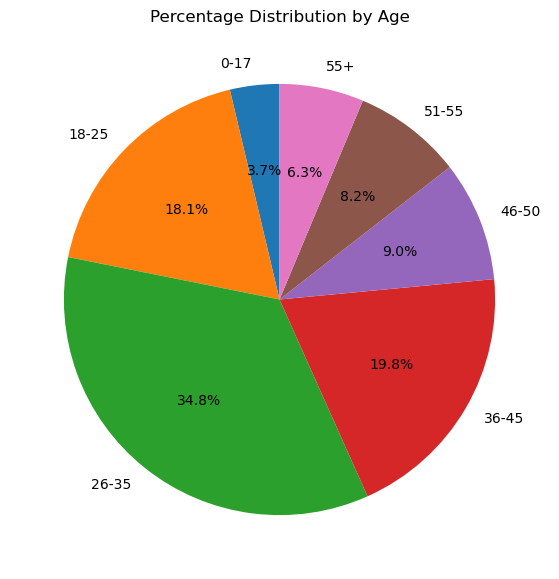

In [193]:
# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(df_age['User_ID'],labels=df_age['Age'],autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution by Age')
plt.show()

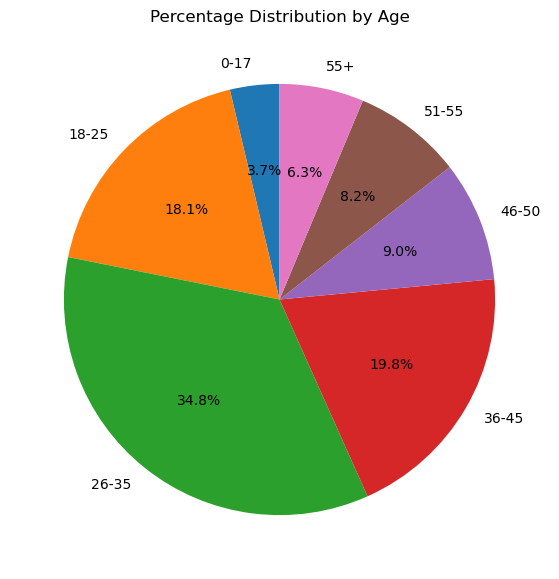

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided data
data = {
    'Age': ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
    'User_ID': [218, 1069, 2053, 1167, 531, 481, 372]
}
df = pd.DataFrame(data)

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(df['User_ID'], labels=df['Age'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution by Age')
plt.show()

In [194]:
df_age_revenue = pd.DataFrame(df.groupby(by = 'Age', as_index = False)['Purchase'].sum()).sort_values(by = 'Purchase', ascending = False)


In [195]:
df_age_revenue

,Age,Purchase
2,26-35,2031770578
3,36-45,1026569884
1,18-25,913848675
4,46-50,420843403
5,51-55,367099644
6,55+,200767375
0,0-17,134913183


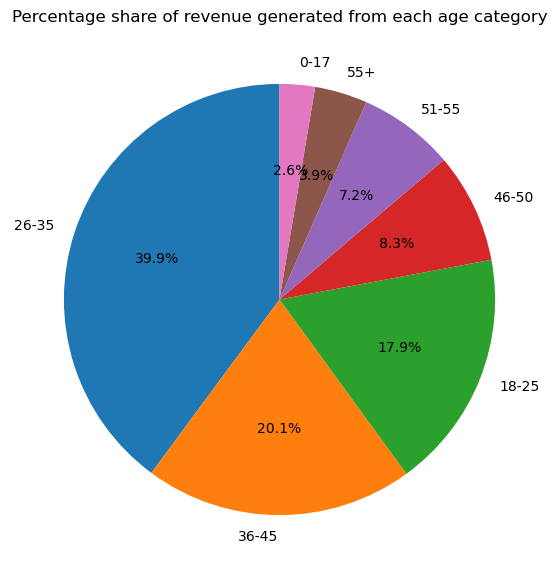

In [197]:

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(df_age_revenue['Purchase'], labels=df_age_revenue['Age'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage share of revenue generated from each age category')
plt.show()

In [210]:
#What is the revenue generated from different product categories ?
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


In [211]:
df_product = df.groupby(by=['Product_Category'])['Purchase'].sum().to_frame().reset_index()

In [212]:
df_product['percentage'] = (df_product['Purchase']/df_product['Purchase'].sum())*100

In [213]:
df_product.sort_values(by='percentage',ascending=False)

,Product_Category,Purchase,percentage
0,1,1910013754,37.482024
4,5,941835229,18.482532
7,8,854318799,16.765114
5,6,324150302,6.361111
1,2,268516186,5.269350
2,3,204084713,4.004949
15,16,145120612,2.847840
10,11,113791115,2.233032
9,10,100837301,1.978827
14,15,92969042,1.824420


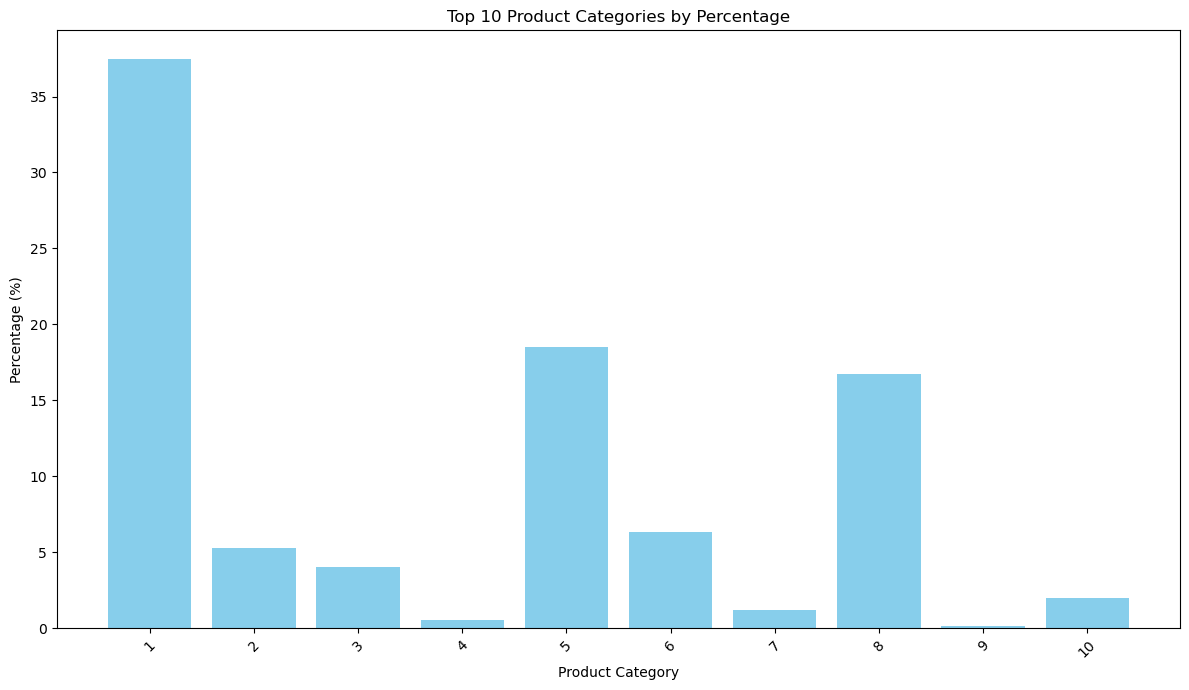

In [220]:
top_10 = df_product.head(10)
 
plt.figure(figsize=(12, 7))
plt.bar(top_10['Product_Category'].astype(str), top_10['percentage'],color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Percentage (%)')
plt.title('Top 10 Product Categories by Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [226]:
#Univariate anlaysis

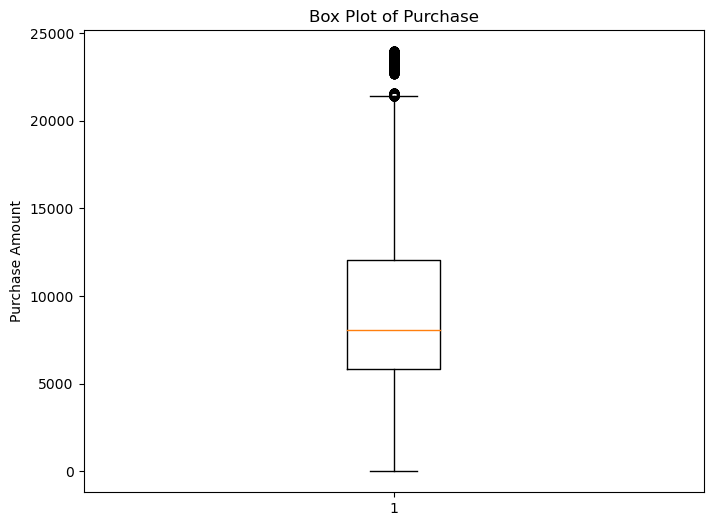

In [227]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Purchase'])
plt.title('Box Plot of Purchase')
plt.ylabel('Purchase Amount')
plt.show()

In [228]:
#The median purchase amount is slightly above 10,000.
#50% of the purchase amounts (the IQR) lie between roughly 7,500 and 15,000.
#There are outliers on the upper side, with one notably large purchase amount beyond 20,000.

<Axes: xlabel='Purchase', ylabel='Count'>

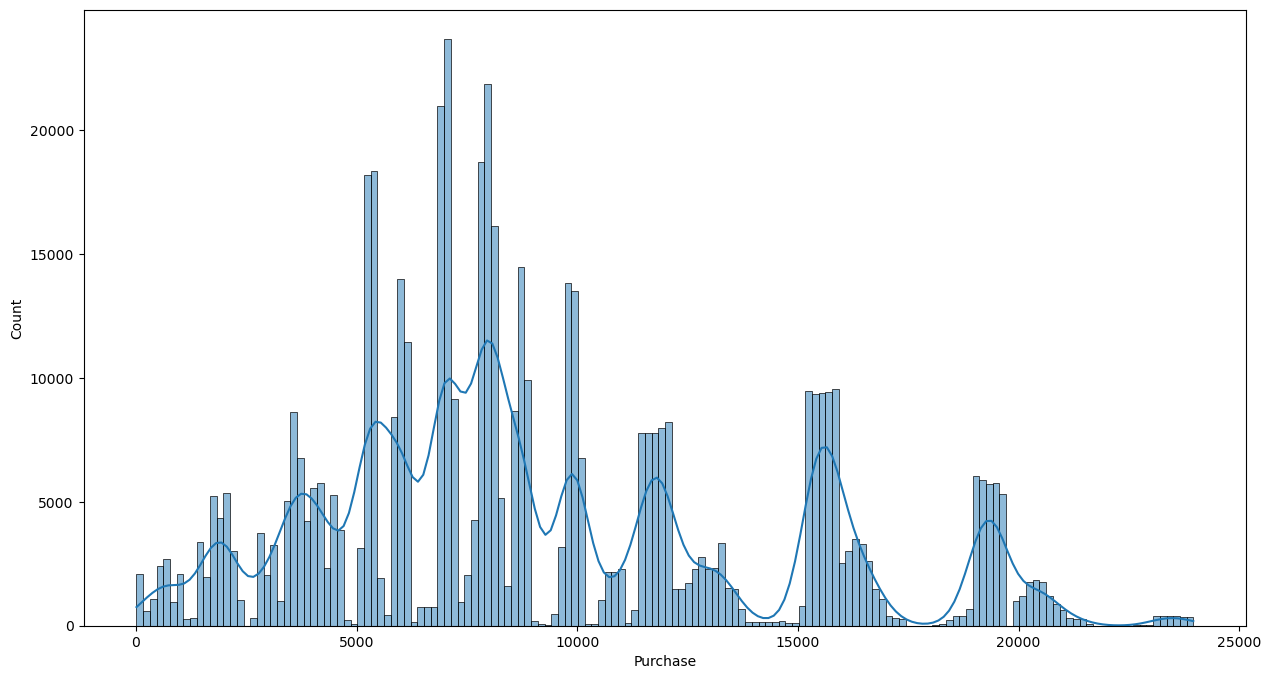

In [231]:
plt.figure(figsize = (15, 8))

sns.histplot(data = df,x = 'Purchase',kde=True)

[]

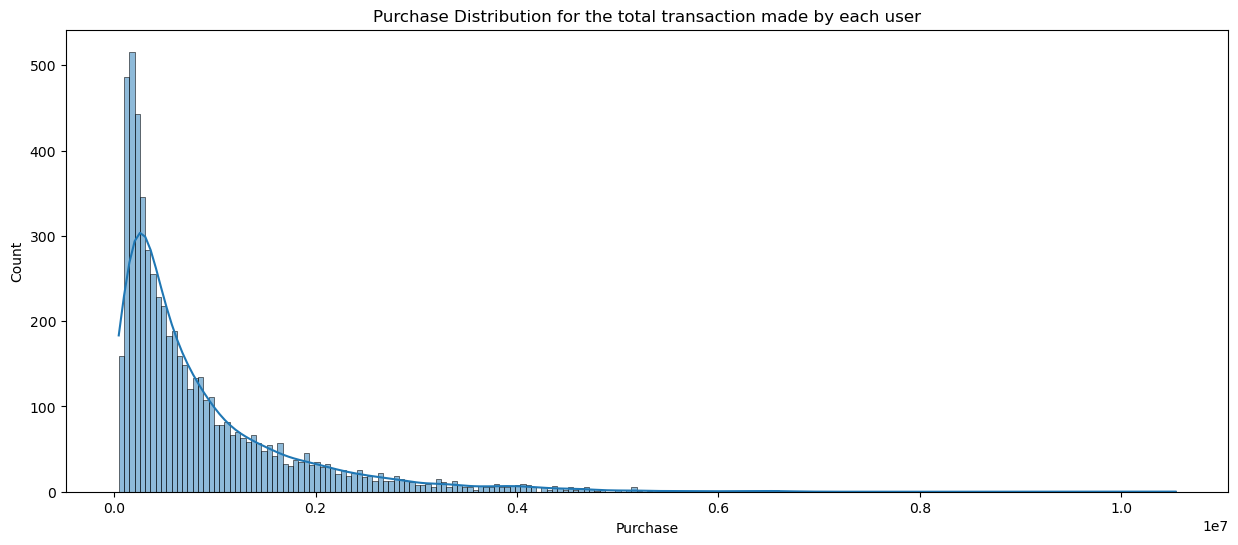

In [232]:
plt.figure(figsize = (15, 6))
plt.title('Purchase Distribution for the total transaction made by each user')
df_customer = df.groupby(by = 'User_ID')['Purchase'].sum()
sns.histplot(data = df_customer, kde = True, bins = 200)
plt.plot()

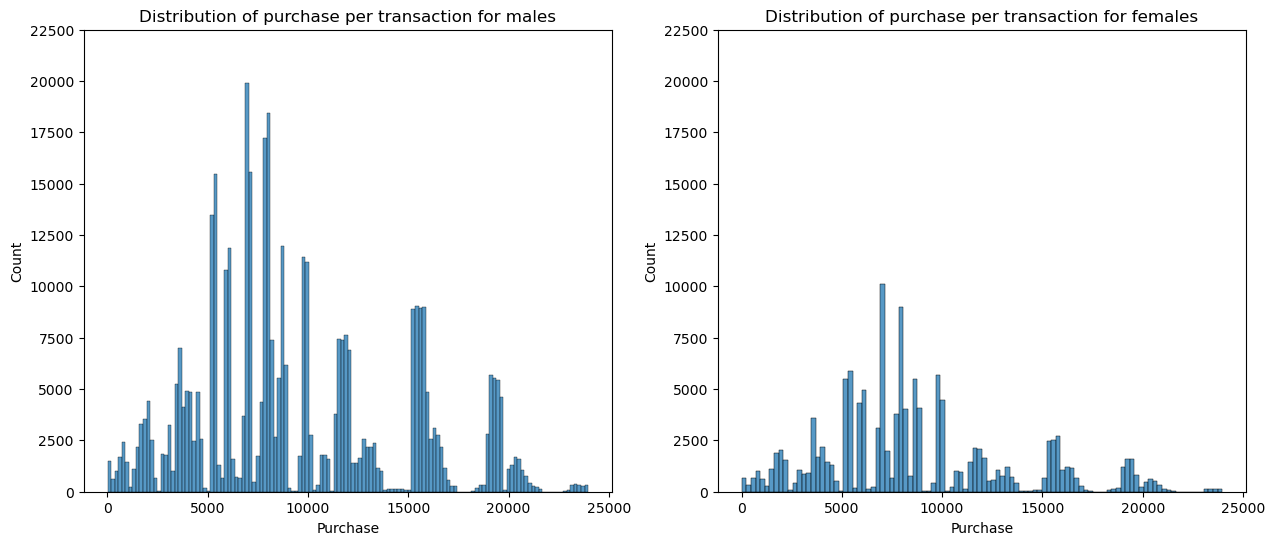

In [238]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for males')
df_male = df[df['Gender'] == 'M']
sns.histplot(data = df_male, x = 'Purchase')
plt.yticks(np.arange(0, 22550, 2500))
plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for females')
df_female = df[df['Gender'] == 'F']
sns.histplot(data = df_female, x = 'Purchase')
plt.yticks(np.arange(0, 22550, 2500))
plt.show()

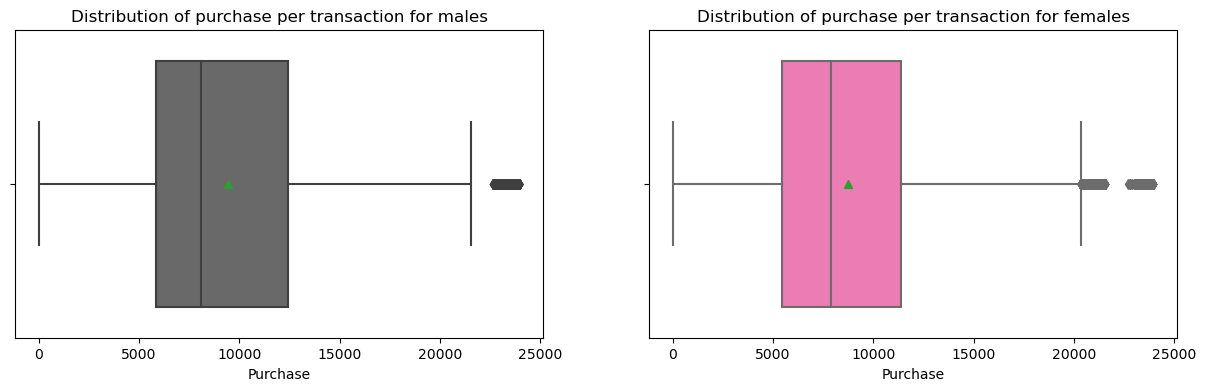

In [240]:
df_cust_gender = pd.DataFrame(df.groupby(by = ['Gender', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})

df_male_customer = df_cust_gender.loc[df_cust_gender['Gender'] == 'M']
df_female_customer = df_cust_gender.loc[df_cust_gender['Gender'] == 'F']
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for males')
sns.boxplot(data = df_male, x = 'Purchase', showmeans = True, color = 'dimgray')
plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for females')
sns.boxplot(data = df_female, x = 'Purchase', showmeans = True, color = 'hotpink')
plt.show()

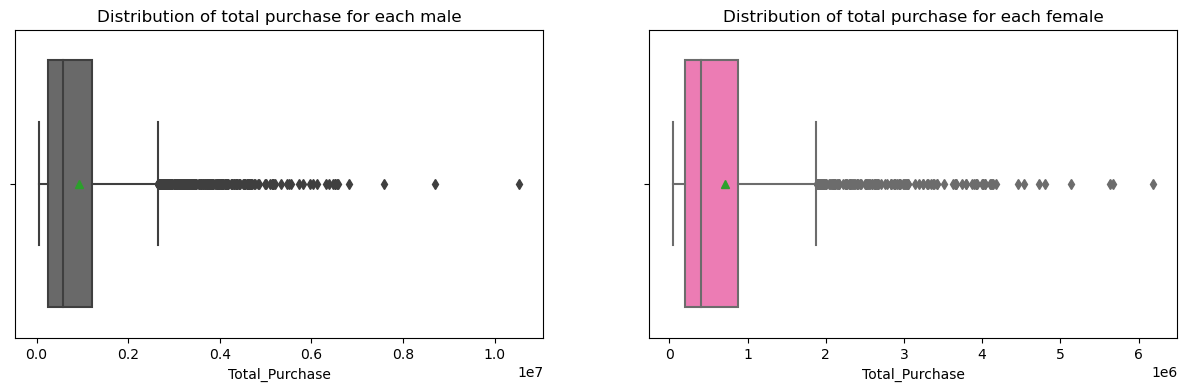

In [241]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of total purchase for each male')
sns.boxplot(data = df_male_customer, x = 'Total_Purchase', showmeans = True, color = 'dimgray')
plt.subplot(1, 2 ,2)
plt.title('Distribution of total purchase for each female')
sns.boxplot(data = df_female_customer, x = 'Total_Purchase', showmeans = True, color = 'hotpink')
plt.show()

[]

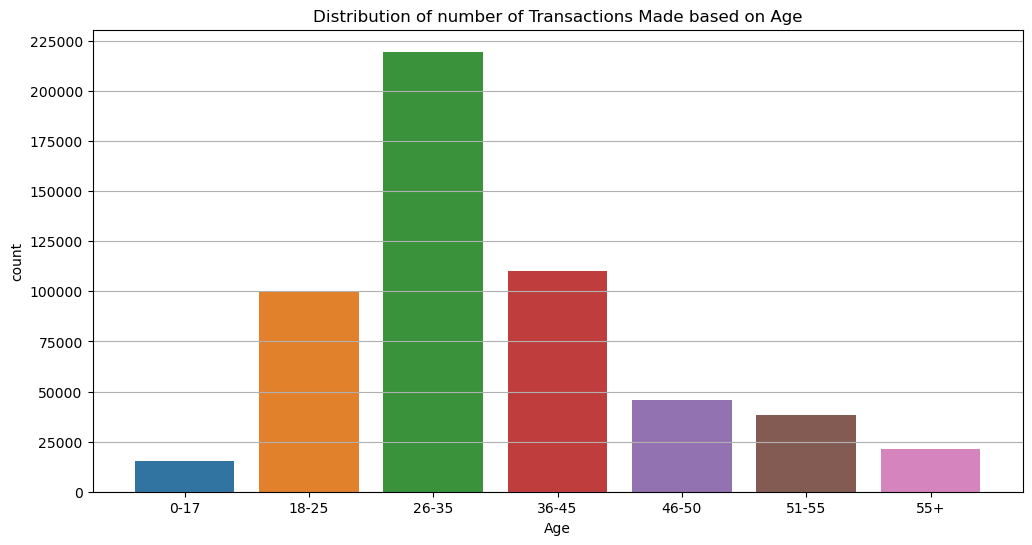

In [242]:
plt.figure(figsize = (12, 6))
plt.title('Distribution of number of Transactions Made based on Age')
plt.yticks(np.arange(0, 250001, 25000))
plt.grid('y')
sns.countplot(data = df, x = 'Age', 
              order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.plot()

[]

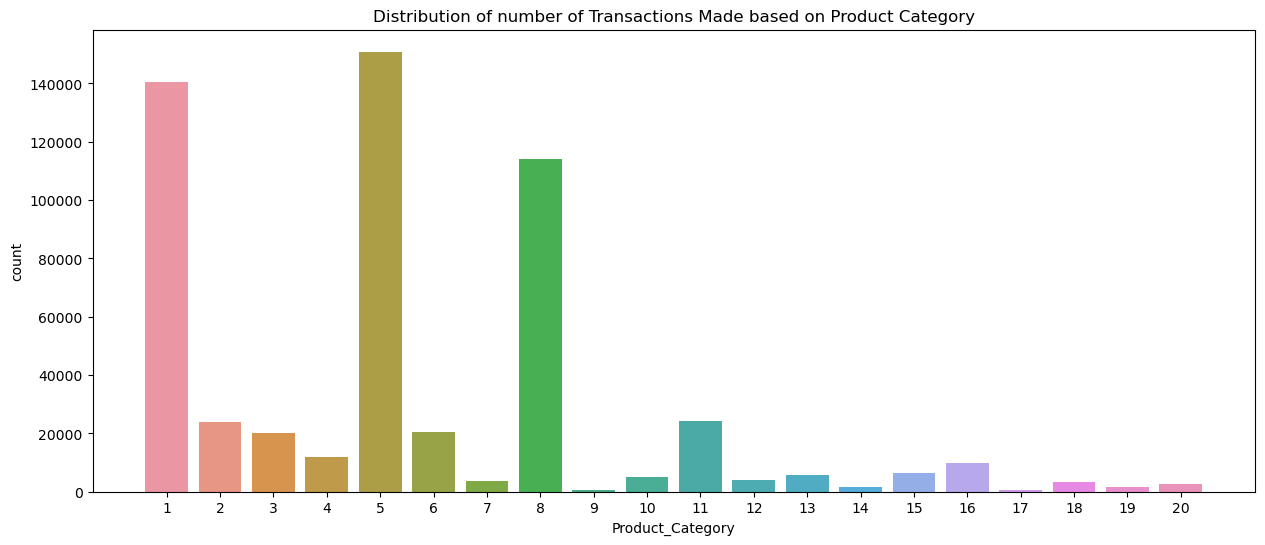

In [244]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of number of Transactions Made based on Product Category')
sns.countplot(data = df, x = 'Product_Category')
plt.plot()

[]

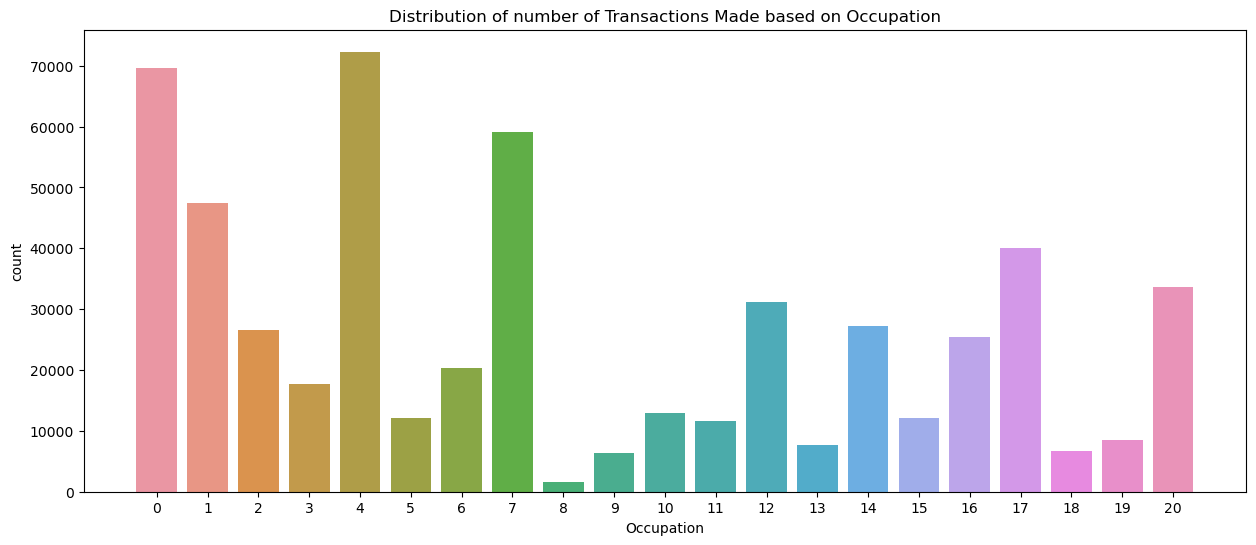

In [247]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of number of Transactions Made based on Occupation' )
sns.countplot(data = df, x = 'Occupation')
plt.plot()

[]

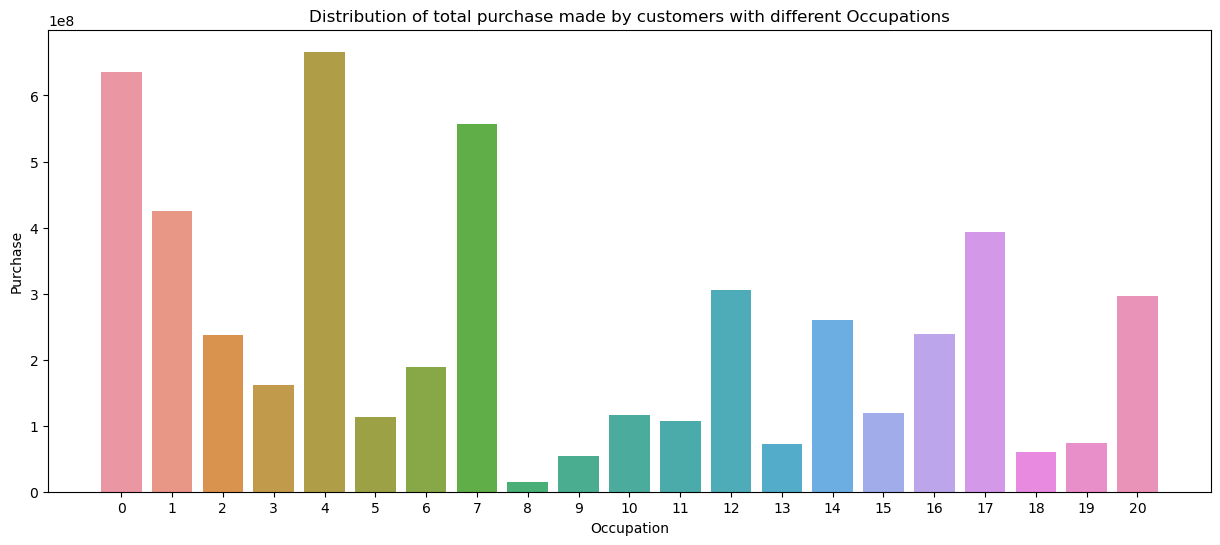

In [248]:
df_occupation = df.groupby(by = 'Occupation')['Purchase'].sum().to_frame().reset_index()
plt.figure(figsize = (15, 6))
plt.title('Distribution of total purchase made by customers with different Occupations' )
sns.barplot(data = df_occupation, x = 'Occupation', y = 'Purchase')
plt.plot()

In [249]:
#Bivariate Analysis

[]

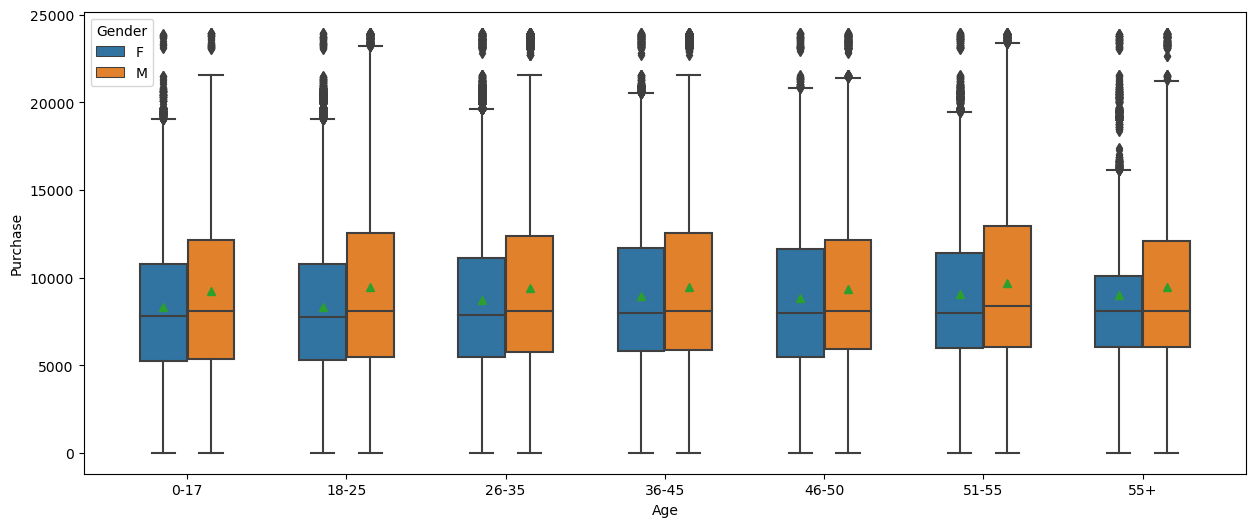

In [250]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender', showmeans = True, width = 0.6)
plt.plot()

[]

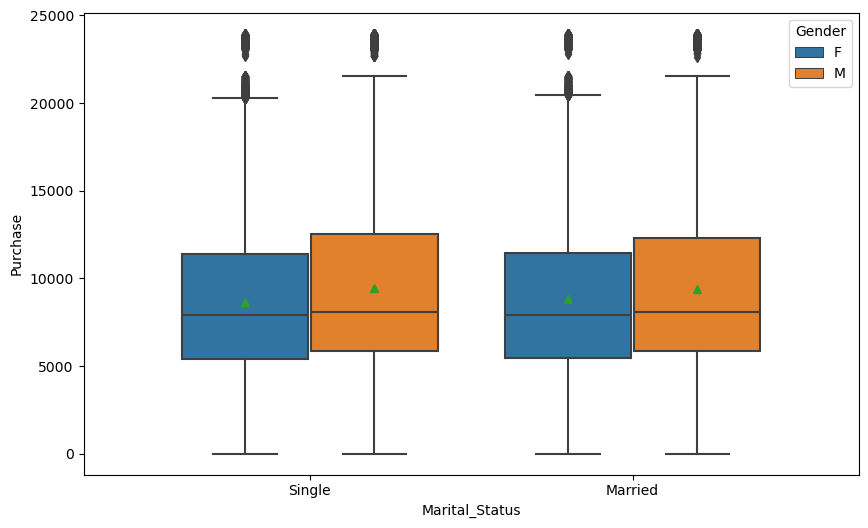

In [251]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase', hue = 'Gender', showmeans = True, width  = 0.8)
plt.plot()

[]

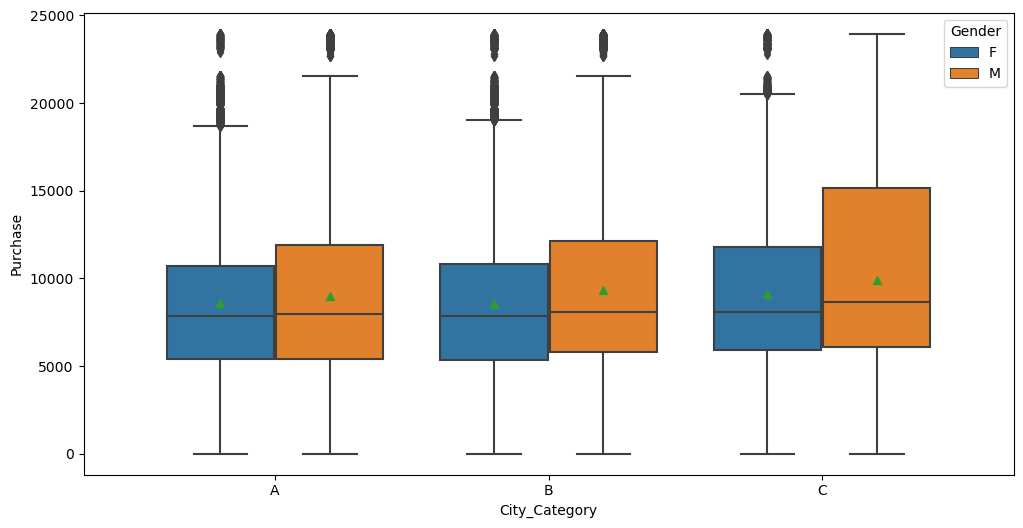

In [252]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'City_Category', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.plot()

[]

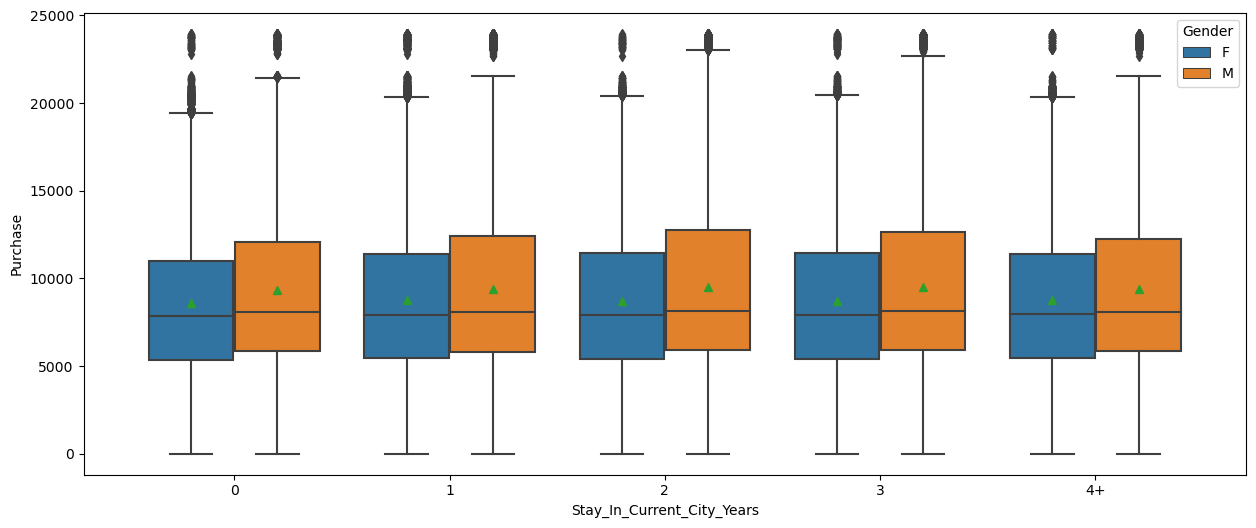

In [253]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = df, x = 'Stay_In_Current_City_Years', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.plot()

[]

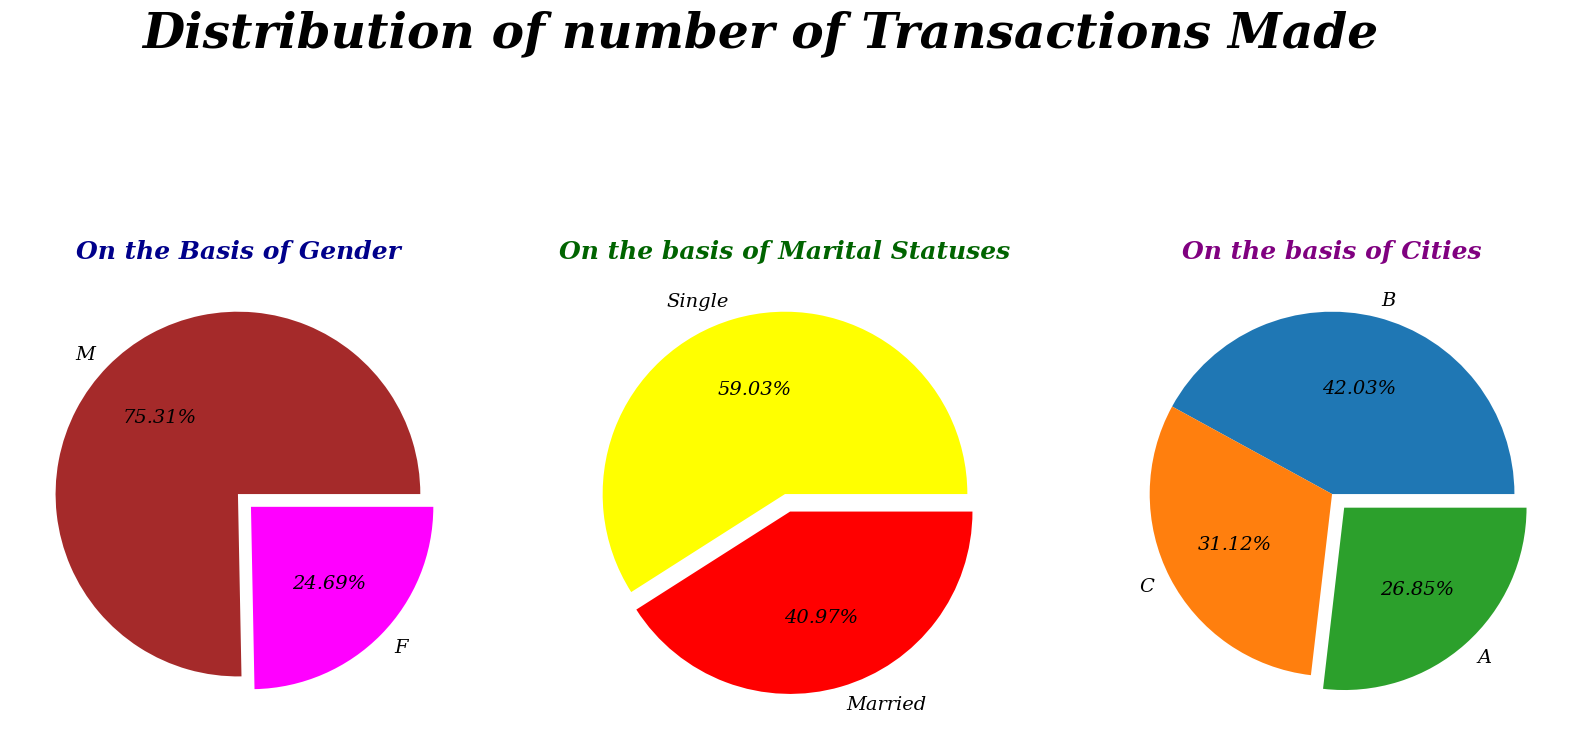

In [319]:
plt.figure(figsize = (20, 10))
plt.suptitle('Distribution of number of Transactions Made', fontsize = 35, fontweight = 600, fontfamily = 'serif', fontstyle = 'oblique')
plt.subplot(1, 3, 1)
plt.title('On the Basis of Gender', color = 'darkblue', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
df_gender_dist = np.round(df['Gender'].value_counts(normalize = True) * 100, 2)
plt.pie(x = df_gender_dist.values, labels = df_gender_dist.index, 
        explode = [0, 0.1], autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500},
       colors = ['brown', 'magenta'])
plt.plot()
plt.subplot(1, 3, 2)
plt.title('On the basis of Marital Statuses', color = 'darkgreen', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
df_Marital_Status_dist = np.round(df['Marital_Status'].value_counts(normalize = True) * 100, 2)
plt.pie(x = df_Marital_Status_dist.values, labels = df_Marital_Status_dist.index, 
        explode = [0, 0.1], autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500},
       colors = ['yellow', 'red'])
plt.plot()
plt.subplot(1, 3, 3)
plt.title("On the basis of Cities", color = 'purple', fontdict = {'fontsize' : 18,
                                                'fontweight' : 555,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
df_City_Category_dist = np.round(df['City_Category'].value_counts(normalize = True) * 100, 2)
plt.pie(x = df_City_Category_dist.values, labels = df_City_Category_dist.index, 
        explode = [0, 0, 0.1], autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})
plt.plot()

In [254]:
#Finding the confidence interval of each male's total spending on the Black Friday

In [257]:
means_male = []
size = df_male_customer['Total_Purchase'].shape[0]
for _ in range(10000):
    sample_mean = df_male_customer['Total_Purchase'].sample(size, replace = True).mean()
    means_male.append(sample_mean)

[]

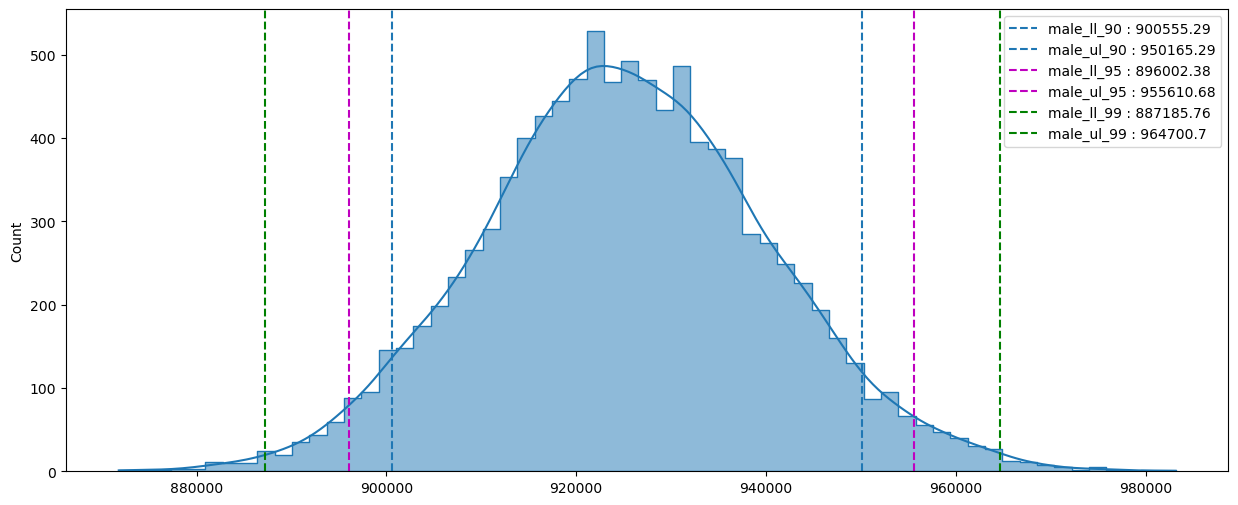

In [267]:
#clearly shows the normal distribution
plt.figure(figsize = (15, 6))
sns.histplot(means_male, kde = True,  fill = True, element = 'step')

male_ll_90 = np.percentile(means_male, 5)
    # calculating the lower limit of the 90% confidence interval
male_ul_90 = np.percentile(means_male, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(male_ll_90, label = f'male_ll_90 : {round(male_ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(male_ul_90, label = f'male_ul_90 : {round(male_ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
    
male_ll_95 = np.percentile(means_male, 2.5)
male_ul_95 = np.percentile(means_male, 97.5)
plt.axvline(male_ll_95, label = f'male_ll_95 : {round(male_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(male_ul_95, label = f'male_ul_95 : {round(male_ul_95, 2)}', linestyle = '--', color = 'm')


male_ll_99 = np.percentile(means_male, 0.5)
male_ul_99 = np.percentile(means_male, 99.5)
plt.axvline(male_ll_99, label = f'male_ll_99 : {round(male_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(male_ul_99, label = f'male_ul_99 : {round(male_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     # displaying a legend for the plotted lines.
plt.plot()       # displaying the plot.
    

In [268]:
approx_population_mean = np.mean(means_male)

In [270]:
print("Population mean will be approx",approx_population_mean) 

Population mean will be approx 925158.9781635267


In [271]:
#Finding the confidence interval of each male's total spending on the Black Friday

In [272]:
means_female = []
size = df_female_customer['Total_Purchase'].shape[0]
for _ in range(10000):
    sample_mean = df_female_customer['Total_Purchase'].sample(size, replace = True).mean()
    means_female.append(sample_mean)

[]

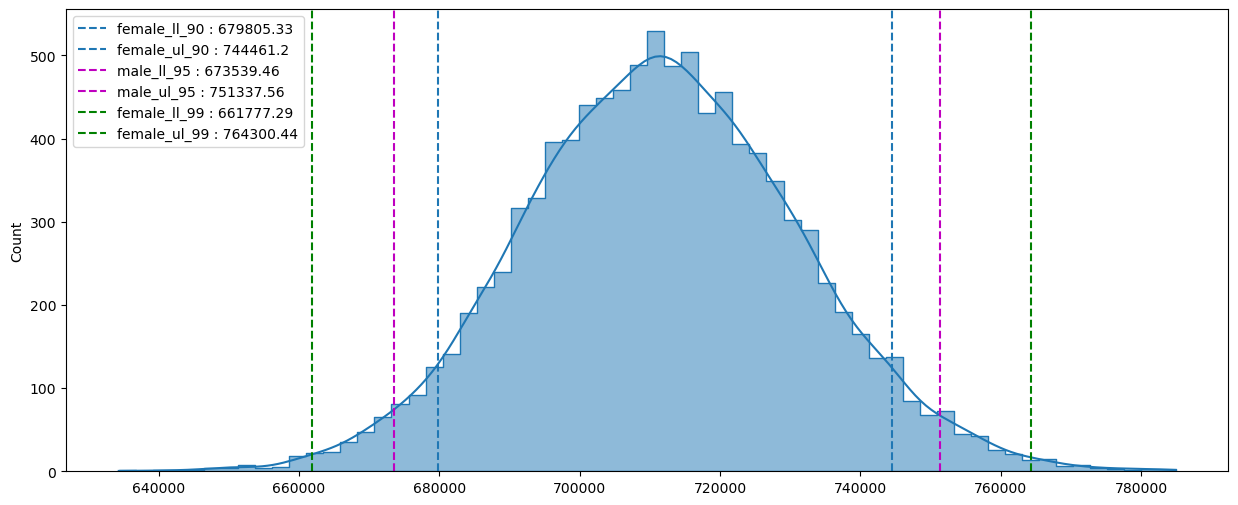

In [274]:
#clearly shows the normal distribution
plt.figure(figsize = (15, 6))
sns.histplot(means_female, kde = True,  fill = True, element = 'step')

female_ll_90 = np.percentile(means_female, 5)
    # calculating the lower limit of the 90% confidence interval
female_ul_90 = np.percentile(means_female, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(female_ll_90, label = f'female_ll_90 : {round(female_ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(female_ul_90, label = f'female_ul_90 : {round(female_ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
    
female_ll_95 = np.percentile(means_female, 2.5)
female_ul_95 = np.percentile(means_female, 97.5)
plt.axvline(female_ll_95, label = f'male_ll_95 : {round(male_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(female_ul_95, label = f'male_ul_95 : {round(male_ul_95, 2)}', linestyle = '--', color = 'm')


female_ll_99 = np.percentile(means_female, 0.5)
female_ul_99 = np.percentile(means_female, 99.5)
plt.axvline(male_ll_99, label = f'female_ll_99 : {round(female_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(male_ul_99, label = f'female_ul_99 : {round(female_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     # displaying a legend for the plotted lines.
plt.plot()       # displaying the plot.
    

In [275]:
print(f"The population mean of total spending of each female will be approximately = {np.round(np.mean(means_female), 2)} ")


The population mean of total spending of each female will be approximately = 711667.75 


We can conclude that, on average, males tend to spend more on purchases compared to females. This observation suggests a potential difference in spending behavior between genders.

In [279]:
#Finding the confidence interval of each single's total spending on the Black Friday

In [286]:
df_single = df.loc[df['Marital_Status'] == 'Single']
df_married = df.loc[df['Marital_Status'] == 'Married']

df_single = df_single.groupby('User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_married = df_married.groupby('User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})


In [287]:
single_means = []
size = df_single['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_single['Total_Purchase'].sample(size, replace = True).mean()
    single_means.append(sample_mean)


[]

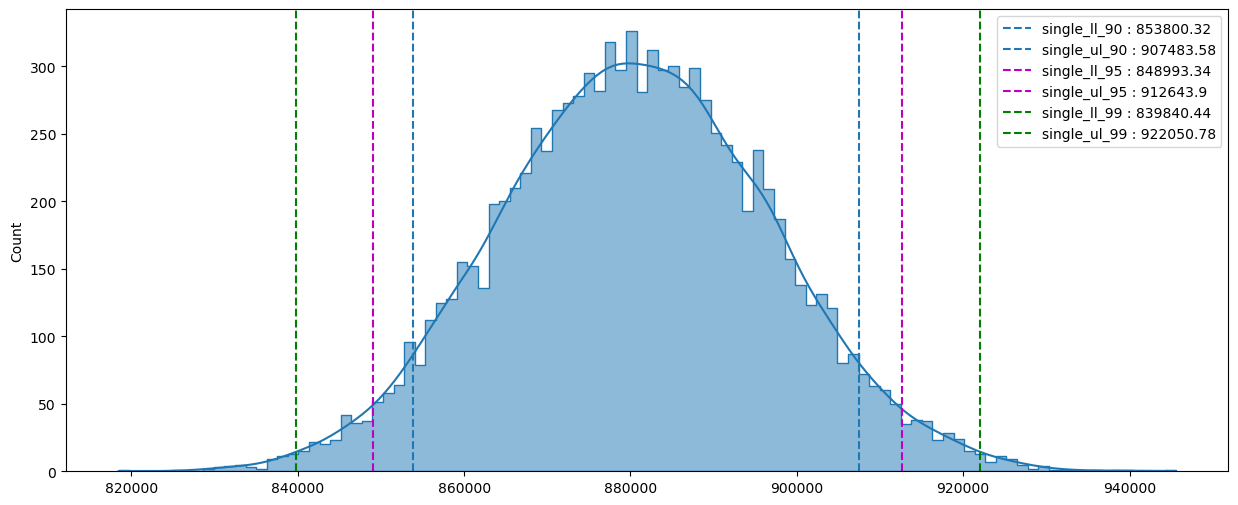

In [288]:
# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(single_means, kde = True, bins = 100, fill = True, element = 'step')

# Above line plots a histogram of the data contained in the `single_means` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
single_ll_90 = np.percentile(single_means, 5)
    # calculating the lower limit of the 90% confidence interval
single_ul_90 = np.percentile(single_means, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(single_ll_90, label = f'single_ll_90 : {round(single_ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(single_ul_90, label = f'single_ul_90 : {round(single_ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)

single_ll_95 = np.percentile(single_means, 2.5)
single_ul_95 = np.percentile(single_means, 97.5)
plt.axvline(single_ll_95, label = f'single_ll_95 : {round(single_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(single_ul_95, label = f'single_ul_95 : {round(single_ul_95, 2)}', linestyle = '--', color = 'm')


single_ll_99 = np.percentile(single_means, 0.5)
single_ul_99 = np.percentile(single_means, 99.5)
plt.axvline(single_ll_99, label = f'single_ll_99 : {round(single_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(single_ul_99, label = f'single_ul_99 : {round(single_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     # displaying a legend for the plotted lines.
plt.plot()       # displaying the plot.

In [289]:
print(f"The population mean of total spending of each single will be approximately = {np.round(np.mean(single_means), 2)} ")

The population mean of total spending of each single will be approximately = 880562.07 


In [290]:
married_means = []
size = df_married['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_married['Total_Purchase'].sample(size, replace = True).mean()
    married_means.append(sample_mean)

[]

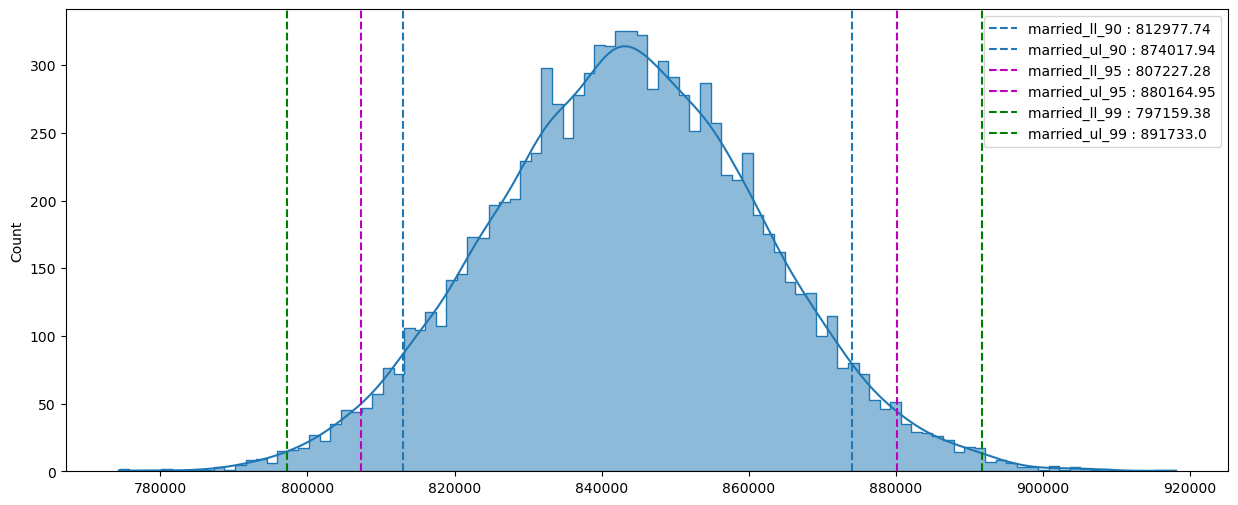

In [291]:
# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(married_means, kde = True, bins = 100, fill = True, element = 'step')

# Above line plots a histogram of the data contained in the `married_means` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
married_ll_90 = np.percentile(married_means, 5)
    # calculating the lower limit of the 90% confidence interval
married_ul_90 = np.percentile(married_means, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(married_ll_90, label = f'married_ll_90 : {round(married_ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(married_ul_90, label = f'married_ul_90 : {round(married_ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)

married_ll_95 = np.percentile(married_means, 2.5)
married_ul_95 = np.percentile(married_means, 97.5)
plt.axvline(married_ll_95, label = f'married_ll_95 : {round(married_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(married_ul_95, label = f'married_ul_95 : {round(married_ul_95, 2)}', linestyle = '--', color = 'm')


married_ll_99 = np.percentile(married_means, 0.5)
married_ul_99 = np.percentile(married_means, 99.5)
plt.axvline(married_ll_99, label = f'married_ll_99 : {round(married_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(married_ul_99, label = f'married_ul_99 : {round(married_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     # displaying a legend for the plotted lines.
plt.plot()       # displaying the plot.

In [292]:
print(f"The population mean of total spending of each male will be approximately = {np.round(np.mean(married_means), 2)} ")


The population mean of total spending of each male will be approximately = 843429.77 


[]

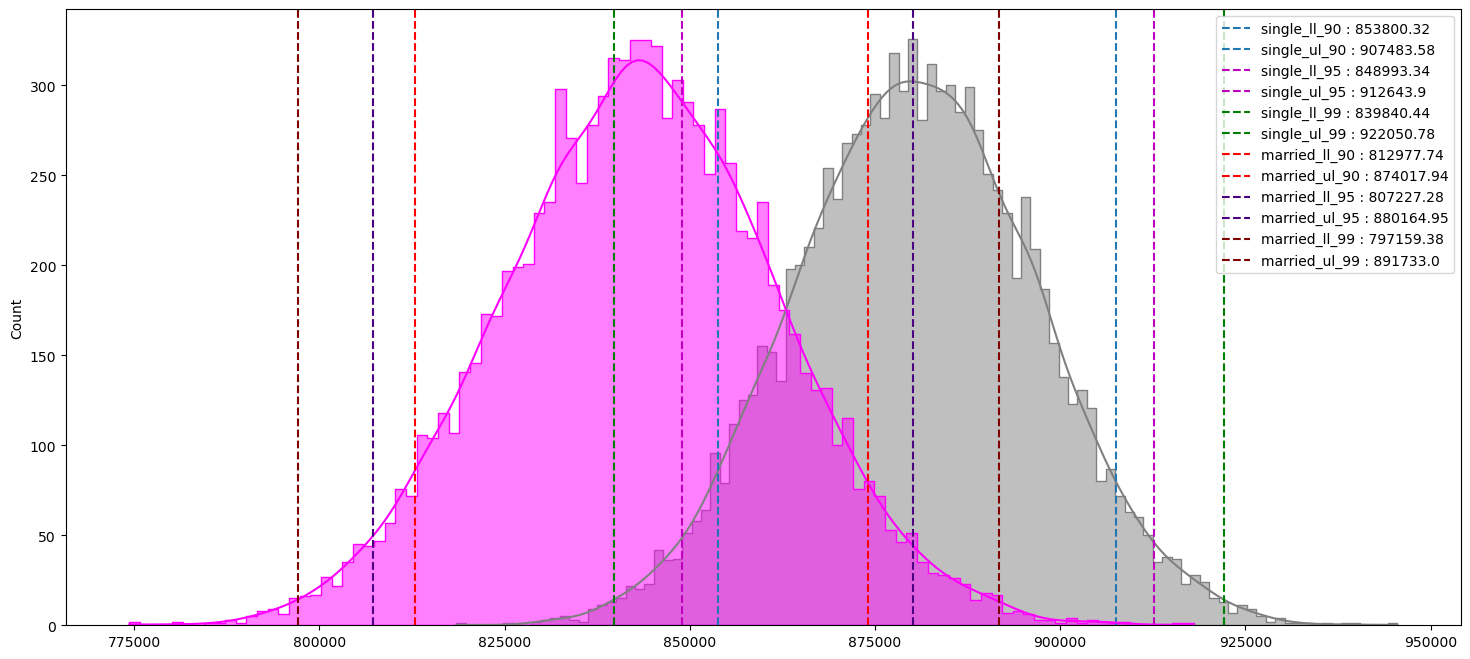

In [293]:
# The code generates a histogram plot to visualize the distributions of single_means and married_means,
    # along with vertical lines indicating confidence interval limits at different confidence levels
    
plt.figure(figsize = (18, 8))

# The first histogram represents the distribution of single_means with gray color having 
    # KDE (Kernel Density Estimation) curves enabled for smooth representation.
sns.histplot(single_means, 
             kde = True, 
             bins = 100, 
             fill = True, 
             element = 'step', 
             color = 'gray',
             legend = True)

# Multiple vertical lines are plotted to represent the lower and upper limits 
    # for confidence intervals at different confidence levels
plt.axvline(single_ll_90, label = f'single_ll_90 : {round(single_ll_90, 2)}', linestyle = '--')
plt.axvline(single_ul_90, label = f'single_ul_90 : {round(single_ul_90, 2)}', linestyle = '--')
plt.axvline(single_ll_95, label = f'single_ll_95 : {round(single_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(single_ul_95, label = f'single_ul_95 : {round(single_ul_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(single_ll_99, label = f'single_ll_99 : {round(single_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(single_ul_99, label = f'single_ul_99 : {round(single_ul_99, 2)}', linestyle = '--', color = 'g')

# The second histogram represents the distribution of married_means with magenta color
    # KDE (Kernel Density Estimation) curves enabled for smooth representation.
sns.histplot(married_means, 
             kde = True, 
             bins = 100, 
             fill = True, 
             element = 'step', 
             color = 'magenta',
             legend = True)

# Multiple vertical lines are plotted to represent the lower and upper limits 
    # for confidence intervals at different confidence levels
plt.axvline(married_ll_90, label = f'married_ll_90 : {round(married_ll_90, 2)}', linestyle = '--', color = 'r')
plt.axvline(married_ul_90, label = f'married_ul_90 : {round(married_ul_90, 2)}', linestyle = '--', color = 'r')
plt.axvline(married_ll_95, label = f'married_ll_95 : {round(married_ll_95, 2)}', linestyle = '--', color = 'indigo')
plt.axvline(married_ul_95, label = f'married_ul_95 : {round(married_ul_95, 2)}', linestyle = '--', color = 'indigo')
plt.axvline(married_ll_99, label = f'married_ll_99 : {round(married_ll_99, 2)}', linestyle = '--', color = 'maroon')
plt.axvline(married_ul_99, label = f'married_ul_99 : {round(married_ul_99, 2)}', linestyle = '--', color = 'maroon')

plt.legend()
plt.plot()

It can be inferred from the above chart that the distributions of singles' total spending and married individuals' total spending overlap. It suggests that there is no significant difference in spending habits between these two groups.

In [294]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [295]:
df_age_0_to_17 = df.loc[df['Age'] == '0-17']
df_age_18_to_25 = df.loc[df['Age'] == '18-25']
df_age_26_to_35 = df.loc[df['Age'] == '26-35']
df_age_36_to_45 = df.loc[df['Age'] == '36-45']
df_age_46_to_50 = df.loc[df['Age'] == '46-50']
df_age_51_to_55 = df.loc[df['Age'] == '51-55']
df_age_above_55 = df.loc[df['Age'] == '55+']

In [296]:
df_age_0_to_17 = df_age_0_to_17.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_18_to_25 = df_age_18_to_25.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_26_to_35 = df_age_26_to_35.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_36_to_45 = df_age_36_to_45.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_46_to_50 = df_age_46_to_50.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_51_to_55 = df_age_51_to_55.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_above_55 = df_age_above_55.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})


In [297]:
#Finding the confidence interval of total spending for each individual in the age group 0 - 17 on the Black Friday
means = []
size = df_age_0_to_17['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_0_to_17['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

[]

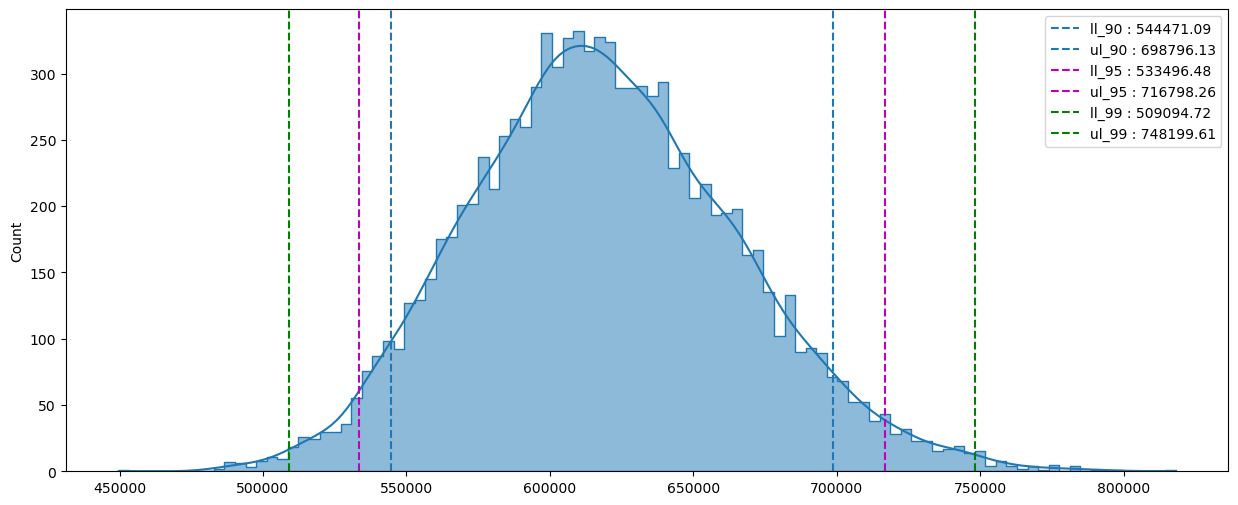

In [298]:
# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')

# Above line plots a histogram of the data contained in the `means` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
ll_90 = np.percentile(means, 5)
    # calculating the lower limit of the 90% confidence interval
ul_90 = np.percentile(means, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     # displaying a legend for the plotted lines.
plt.plot()       # displaying the plot.

In [318]:
print(f"The population mean of total spending of each customer in age group 0 -17 will be approximately = {np.round(np.mean(means), 2)} ")


The population mean of total spending of each customer in age group 0 -17 will be approximately = 792432.13 


In [299]:
#Finding the confidence interval of total spending for each individual in the age group 18 - 25 on the Black Friday
means = []
size = df_age_18_to_25['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

[]

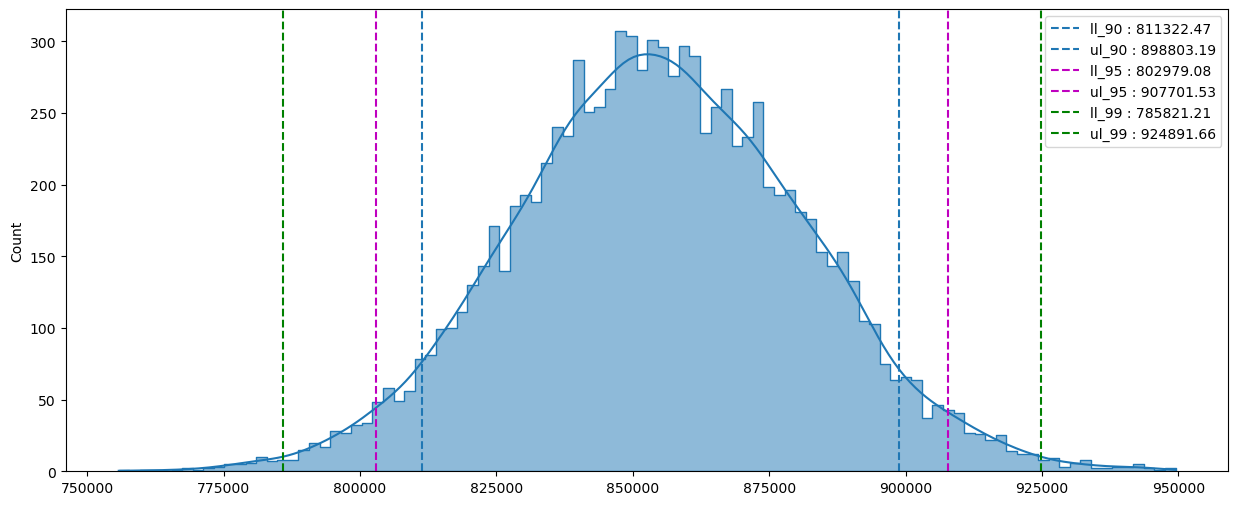

In [300]:
# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')

# Above line plots a histogram of the data contained in the `means` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
ll_90 = np.percentile(means, 5)
    # calculating the lower limit of the 90% confidence interval
ul_90 = np.percentile(means, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     # displaying a legend for the plotted lines.
plt.plot()       # displaying the plot.

In [301]:
print(f"The population mean of total spending of each customer in age group 18 - 25 will be approximately = {np.round(np.mean(means), 2)} ")


The population mean of total spending of each customer in age group 18 - 25 will be approximately = 854886.1 


In [303]:
#For Age Group 26 - 35 years

[]

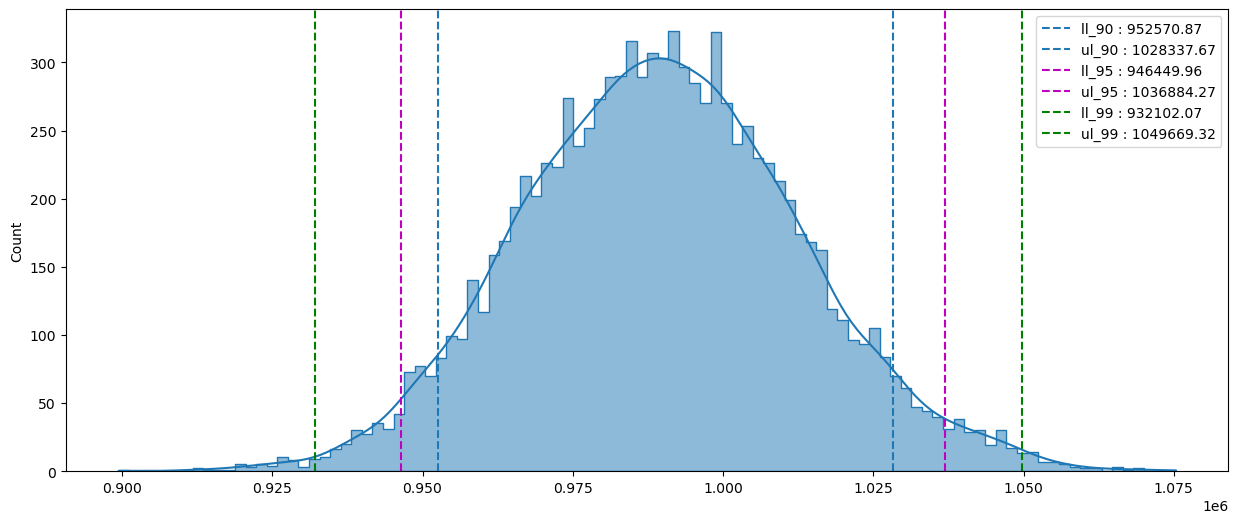

In [304]:
means = []
size = df_age_26_to_35['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_26_to_35['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)
    
# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')

# Above line plots a histogram of the data contained in the `means` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
ll_90 = np.percentile(means, 5)
    # calculating the lower limit of the 90% confidence interval
ul_90 = np.percentile(means, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     # displaying a legend for the plotted lines.
plt.plot()       # displaying the plot.

In [305]:
print(f"The population mean of total spending of each customer in age group 26 - 35 will be approximately = {np.round(np.mean(means), 2)} ")


The population mean of total spending of each customer in age group 26 - 35 will be approximately = 989710.69 


[]

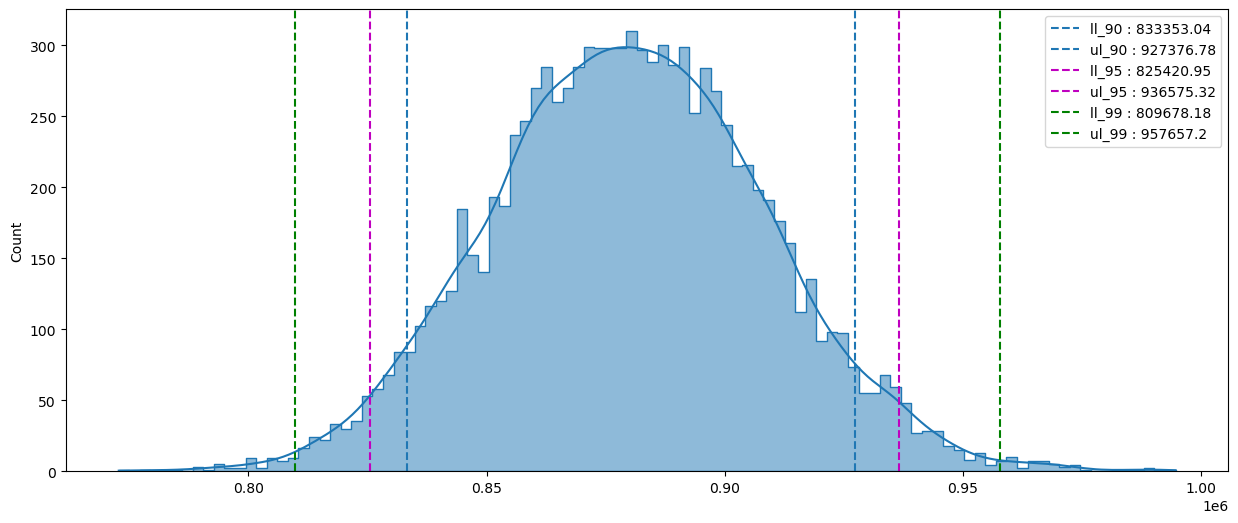

In [306]:
#Finding the confidence interval of total spending for each individual in the age group 36 - 45 on the Black Friday
means = []
size = df_age_36_to_45['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_36_to_45['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)
# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')

# Above line plots a histogram of the data contained in the `means` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
ll_90 = np.percentile(means, 5)
    # calculating the lower limit of the 90% confidence interval
ul_90 = np.percentile(means, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     # displaying a legend for the plotted lines.
plt.plot()       # displaying the plot.

In [307]:
print(f"The population mean of total spending of each customer in age group 36 - 45 will be approximately = {np.round(np.mean(means), 2)} ")


The population mean of total spending of each customer in age group 36 - 45 will be approximately = 879971.32 


[]

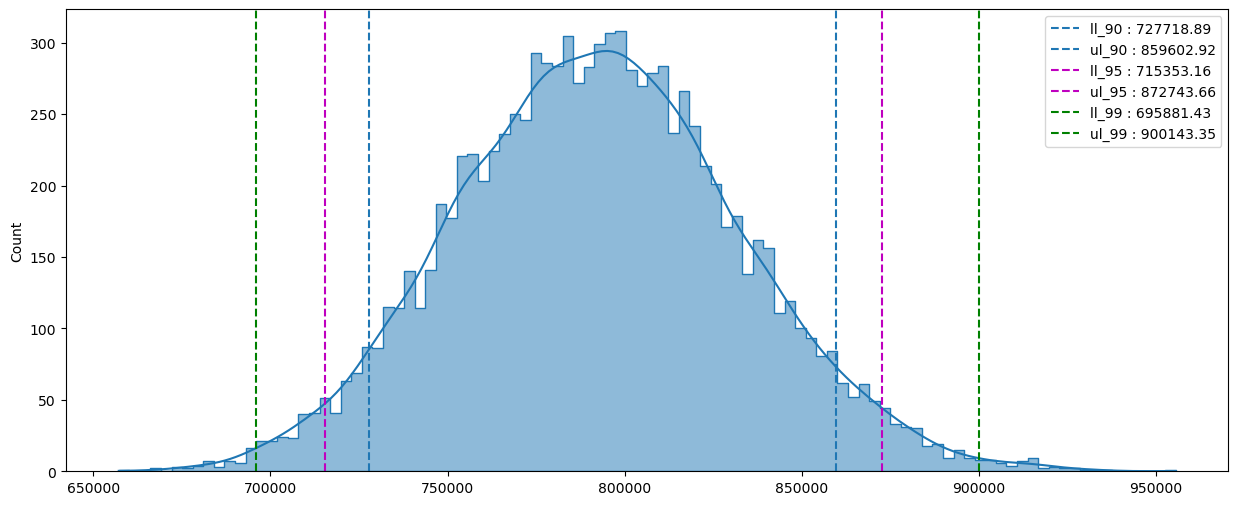

In [308]:
#Finding the confidence interval of total spending for each individual in the age group 46 - 50 on the Black Friday

means = []
size = df_age_46_to_50['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_46_to_50['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')

# Above line plots a histogram of the data contained in the `means` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
ll_90 = np.percentile(means, 5)
    # calculating the lower limit of the 90% confidence interval
ul_90 = np.percentile(means, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     # displaying a legend for the plotted lines.
plt.plot()       # displaying the plot.    

In [309]:
print(f"The population mean of total spending of each customer in age group 46 - 50 will be approximately = {np.round(np.mean(means), 2)} ")


The population mean of total spending of each customer in age group 46 - 50 will be approximately = 792432.13 


** Summary:**

1. **Tailored Marketing for Males**: Most transactions are male-driven; adapt strategies to appeal to them.
 
2. **Occupation-based Marketing**: 82 % of sales come from 11 occupations; tailor campaigns to these groups.

3. **Engagement for New Residents**: Target the 53 % newcomers to the city with welcome offers.

4. **Promote Key Product Categories**: 82 % of sales are in five categories; prioritize them for promotions.

5. **Single Customer Engagement**: Cater to single customers, who contribute 59.05% of revenue.

6. **Age-specific Marketing**: Target customers aged 26-45 as they dominate transactions.

7. **City-specific Strategies**: Focus on cities with high customer concentrations.

8. **Highlight Top Products**: Emphasize the top five revenue-generating categories.

9. **Exclusive Offers for Big Spenders**: Identify and reward top spenders with special deals.

10. **Loyalty Programs**: Launch targeted loyalty incentives for key customer segments.

11. **Expand Popular Product Lines**: Analyze and broaden offerings in top categories.

12. **Regular Customer Engagement**: Use personalized campaigns and social media to keep customers connected.

13. **Collaborate with Brands/Influencers**: Partner with relevant brands or influencers to enhance reach.

14. **Seasonal Promotions**: Capitalize on events and holidays to drive sales.

15. **Solicit Feedback and Reviews**: Encourage reviews and utilize feedback to enhance experience.

16. **Invest in Personalization**: Use tech and data for tailored product recommendations.

17. **Competitive Pricing Strategy**: Monitor market rates and assure customers of the best value.